In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#from tensorflow.keras.metrics import AUC
from tensorflow import keras
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
#import logging
#tf.get_logger().setLevel(logging.ERROR)

In [2]:
# This code imports the data you generated before for replicating.

stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')
arima_predictions_VZ = pd.read_csv('arima_predictions_VZ')

diff_T = stock_prices['T'].diff().dropna()
diff_VZ = stock_prices['VZ'].diff().dropna()
diff_T = stock_prices['T'].diff().dropna()

split = int(len(diff_VZ.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

split = int(len(diff_VZ.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]
diff_train_VZ = diff_VZ.iloc[:split]
diff_test_VZ = diff_VZ.iloc[split:]


In [3]:
n_steps = 10
n_features = 1

In [4]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:

X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In [6]:
def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

In [7]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 210ms/step - loss: 0.3606 - mse: 0.3606 - val_loss: 0.1238 - val_mse: 0.1238
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 0.3195 - mse: 0.3195 - val_loss: 0.1089 - val_mse: 0.1089
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.2852 - mse: 0.2852 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2659 - mse: 0.2659 - val_loss: 0.0743 - val_mse: 0.0743
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2412 - mse: 0.2412 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2155 - mse: 0.2155 - val_loss: 0.0702 - val_mse: 0.0702
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1975 - mse: 0.1975 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 8/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1801 - mse: 0.1

Epoch 62/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 1.4389e-04 - val_mse: 1.4389e-04
Epoch 63/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 8.9484e-05 - val_mse: 8.9484e-05
Epoch 64/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 1.5602e-04 - val_mse: 1.5602e-04
Epoch 65/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 2.1320e-04 - val_mse: 2.1320e-04
Epoch 66/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.7047e-04 - val_mse: 1.7047e-04
Epoch 67/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 1.2174e-04 - val_mse: 1.2174e-04
Epoch 68/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 1.4056e-04 - val_mse: 1.4056e-04
Epoch 69/200
2/2 [=========

Epoch 121/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 1.6366e-04 - val_mse: 1.6366e-04
Epoch 122/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 2.4938e-04 - val_mse: 2.4938e-04
Epoch 123/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 1.9413e-04 - val_mse: 1.9413e-04
Epoch 124/200
2/2 [==============================] - 0s 26ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.2841e-04 - val_mse: 1.2841e-04
Epoch 125/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.1363e-04 - val_mse: 1.1363e-04
Epoch 126/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.3523e-04 - val_mse: 1.3523e-04
Epoch 127/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 1.4145e-04 - val_mse: 1.4145e-04
Epoch 128/200
2/2 [=

2/2 [==============================] - 0s 24ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 1.3566e-04 - val_mse: 1.3566e-04
Epoch 180/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 1.3305e-04 - val_mse: 1.3305e-04
Epoch 181/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.1640e-04 - val_mse: 1.1640e-04
Epoch 182/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.0494e-04 - val_mse: 1.0494e-04
Epoch 183/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.9790e-05 - val_mse: 7.9790e-05
Epoch 184/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 6.1610e-05 - val_mse: 6.1610e-05
Epoch 185/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 9.0570e-05 - val_mse: 9.0570e-05
Epoch 186/200
2/2 [===============

In [8]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [9]:
predictions_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [10]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [11]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4337


Well, the RMSE score of 0.3254, implying it outperforms the traditional time series models. We know that deep learning model works well with non-linear data. However, please also note that, it is not always the case that deep learning models is superior than the other time series model in terms of performance.

In [12]:
print(history_RNN.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


Let me plot the result of loss and test loss result. It turns out, after huge spike, test loss gets back on track and confirms that RNN performs well. 

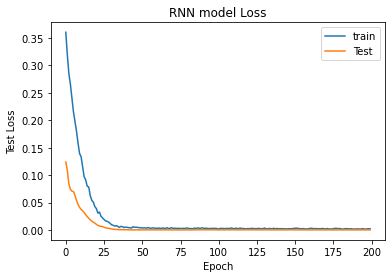

In [13]:
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Let me run `callback` function to see the effect of early stopping in deep learning. 
Early stopping is a tool to employ against overfitting in the sense that it helps us to regularize the model.

The other pros of early stopping is to save time, because training a deep learning model takes time. In early stopping, once the model reaches the target performance, the algorithm automatically stops. In other word, thanks to `patience` paramater below, training stops after the number of epochs without improvement.


In [14]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [15]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2, 
                            callbacks=[callback])

Epoch 1/200
2/2 [==============================] - 1s 175ms/step - loss: 0.3569 - mse: 0.3569 - val_loss: 0.1338 - val_mse: 0.1338


In [16]:
predictions_T = []


for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [17]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4369


In [18]:
X_diff_train_VZ, y_diff_train_VZ = split_sequence(diff_train_VZ, n_steps)
X_diff_train_VZ = X_diff_train_VZ.reshape((X_diff_train_VZ.shape[0],
                                         X_diff_train_VZ.shape[1], n_features))


X_diff_test_VZ, y_diff_test_VZ = split_sequence(diff_test_VZ.values, n_steps)
X_diff_test_VZ = X_diff_test_VZ.reshape((X_diff_test_VZ.shape[0],
                                       X_diff_test_VZ.shape[1], n_features))

In [19]:
def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(64,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

In [20]:
RNN_model = RNN_part()
history_RNN_VZ = RNN_model.fit(X_diff_train_VZ, y_diff_train_VZ,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 171ms/step - loss: 0.7581 - mse: 0.7581 - val_loss: 0.2463 - val_mse: 0.2463
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6428 - mse: 0.6428 - val_loss: 0.2151 - val_mse: 0.2151
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 0.5472 - mse: 0.5472 - val_loss: 0.1914 - val_mse: 0.1914
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 0.5266 - mse: 0.5266 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 5/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4573 - mse: 0.4573 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 6/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.1534 - val_mse: 0.1534
Epoch 7/200
2/2 [==============================] - 0s 19ms/step - loss: 0.3750 - mse: 0.3750 - val_loss: 0.1475 - val_mse: 0.1475
Epoch 8/200
2/2 [==============================] - 0s 20ms/step - loss: 0.3861 - mse: 0.3

2/2 [==============================] - 0s 21ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 4.9812e-04 - val_mse: 4.9812e-04
Epoch 64/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 7.9299e-04 - val_mse: 7.9299e-04
Epoch 65/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 7.2207e-04 - val_mse: 7.2207e-04
Epoch 66/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 4.7031e-04 - val_mse: 4.7031e-04
Epoch 67/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 3.8400e-04 - val_mse: 3.8400e-04
Epoch 68/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 4.8947e-04 - val_mse: 4.8947e-04
Epoch 69/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 3.6092e-04 - val_mse: 3.6092e-04
Epoch 70/200
2/2 [======================

Epoch 122/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 3.7728e-04 - val_mse: 3.7728e-04
Epoch 123/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 2.8703e-04 - val_mse: 2.8703e-04
Epoch 124/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 4.5330e-04 - val_mse: 4.5330e-04
Epoch 125/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 5.6087e-04 - val_mse: 5.6087e-04
Epoch 126/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 4.5562e-04 - val_mse: 4.5562e-04
Epoch 127/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 3.9882e-04 - val_mse: 3.9882e-04
Epoch 128/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 5.2479e-04 - val_mse: 5.2479e-04
Epoch 129/200
2/2 [=

2/2 [==============================] - 0s 22ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 4.3952e-04 - val_mse: 4.3952e-04
Epoch 181/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 5.3012e-04 - val_mse: 5.3012e-04
Epoch 182/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.0918e-04 - val_mse: 4.0918e-04
Epoch 183/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 1.9906e-04 - val_mse: 1.9906e-04
Epoch 184/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 2.1023e-04 - val_mse: 2.1023e-04
Epoch 185/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 2.8619e-04 - val_mse: 2.8619e-04
Epoch 186/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 3.2530e-04 - val_mse: 3.2530e-04
Epoch 187/200
2/2 [===============

In [21]:
start = X_diff_test_VZ[X_diff_test_VZ.shape[0]-1]
VZ_input = start
VZ_input = VZ_input.reshape((1, n_steps, n_features))

In [22]:
predictions_RNN_VZ = []


for i in range(len(arima_predictions_VZ)):
    VZ_input = VZ_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(VZ_input, verbose=0)
    VZ_input = np.append(VZ_input, yhat)
    VZ_input = VZ_input[1:]
    predictions_RNN_VZ.append(yhat)

In [23]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [24]:
print('RMSE of VZ for RNN model {:.4f}'\
      .format(rmse(diff_test_VZ, np.array(predictions_RNN_VZ).flatten())))

RMSE of VZ for RNN model 0.7878


Well, the RMSE score of 0.3254, implying it outperforms the traditional time series models. We know that deep learning model works well with non-linear data. However, please also note that, it is not always the case that deep learning models is superior than the other time series model in terms of performance.

Let me plot the result of loss and test loss result. It turns out, after huge spike, test loss gets back on track and confirms that RNN performs well. 

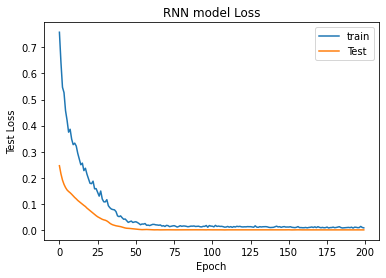

In [25]:
plt.plot(history_RNN_VZ.history['loss'])
plt.plot(history_RNN_VZ.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()